In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")


In [96]:
import os
os.getcwd()



'/Users/jaiveersinghkhanuja/Desktop/churn_project/notebooks:'

In [97]:
df=pd.read_csv("/Users/jaiveersinghkhanuja/Desktop/churn_project/data/customer_churn.csv")

In [98]:
# Number of rows and columns
df.shape


(7043, 21)

In [99]:
# How many customers churn vs stay
df['Churn'].value_counts()
df['Churn'].value_counts(normalize=True)


Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

In [100]:
# Missing values
df.isnull().sum()

# Data types
df.dtypes


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [101]:
# Categorical features
cat_features = df.select_dtypes(include='object').columns.tolist()
cat_features.remove('customerID')  # usually an ID column
print("Categorical features:", cat_features)

# Numerical features
num_features = df.select_dtypes(include=['int64','float64']).columns.tolist()
print("Numerical features:", num_features)


Categorical features: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']
Numerical features: ['SeniorCitizen', 'tenure', 'MonthlyCharges']


In [102]:
# Convert TotalCharges to numeric, coerce errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check for missing values now
df['TotalCharges'].isnull().sum()


np.int64(11)

In [103]:
# Drop customerID column
df = df.drop('customerID', axis=1)

# Update categorical and numerical lists
cat_features = df.select_dtypes(include='object').columns.tolist()
cat_features.remove('Churn')  # keep Churn as target

num_features = df.select_dtypes(include=['int64','float64']).columns.tolist()

print("Categorical features:", cat_features)
print("Numerical features:", num_features)


Categorical features: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
Numerical features: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


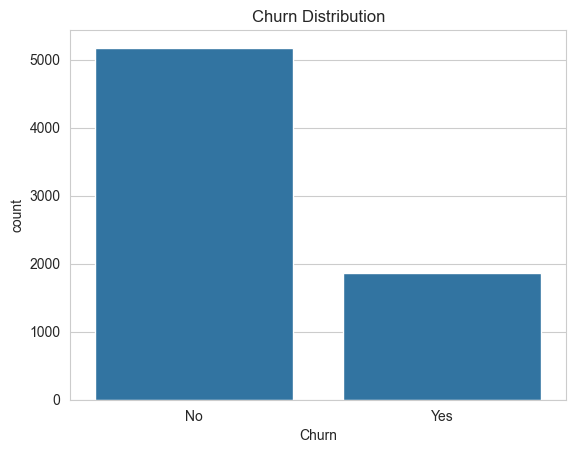

In [104]:
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()


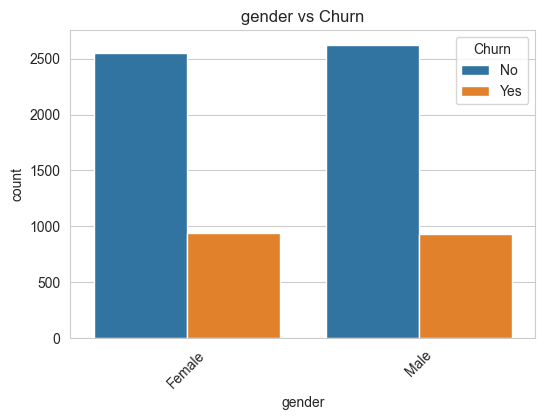

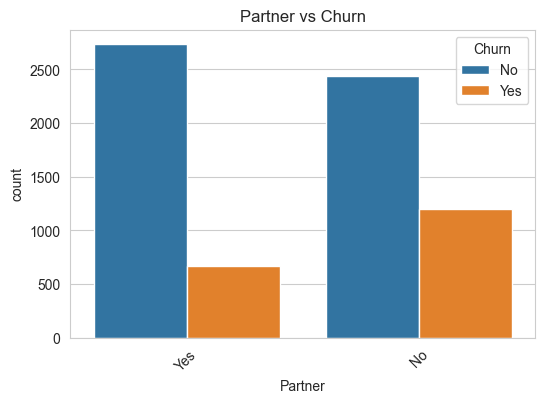

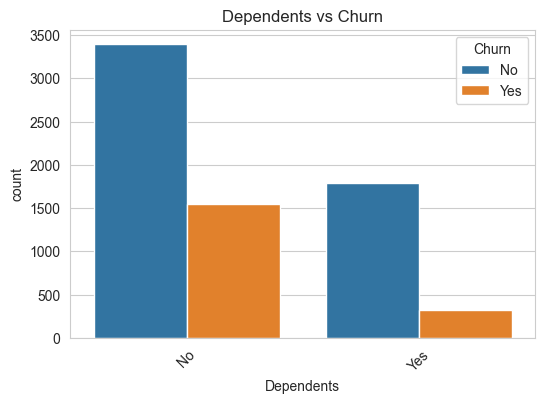

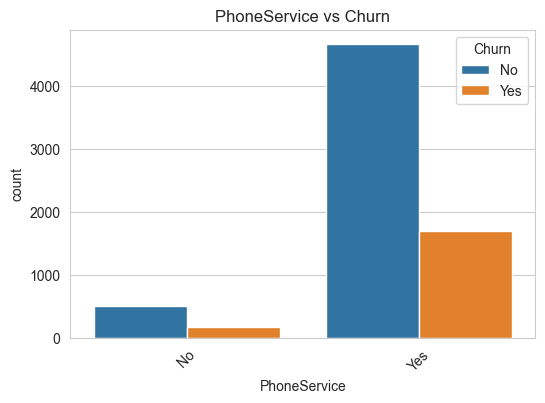

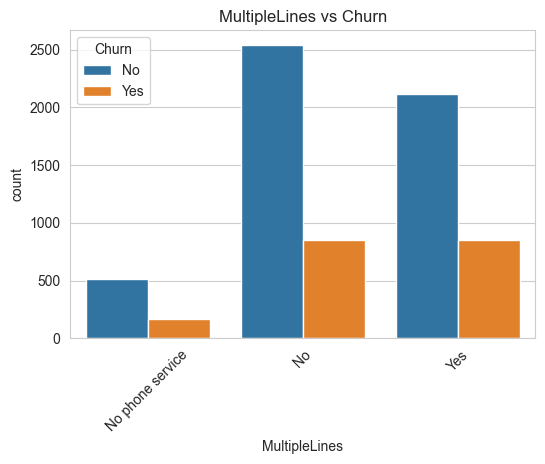

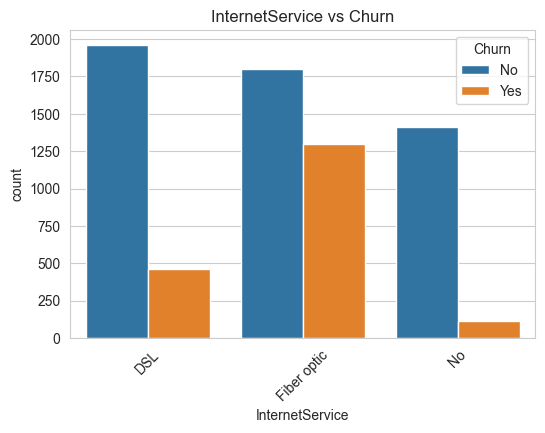

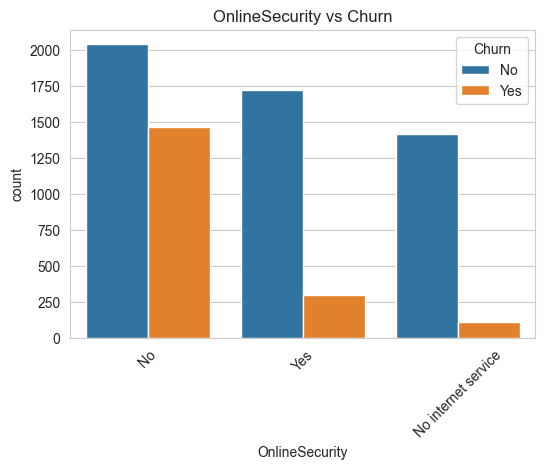

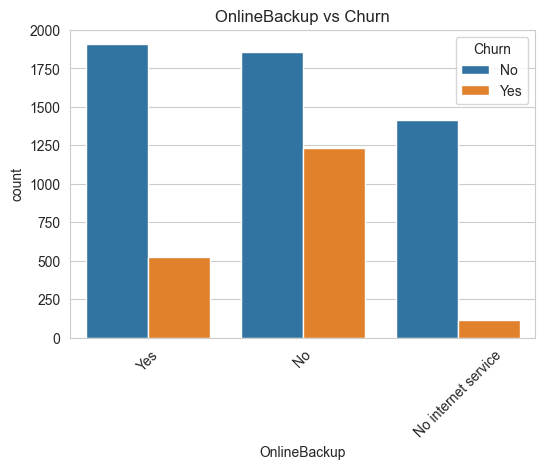

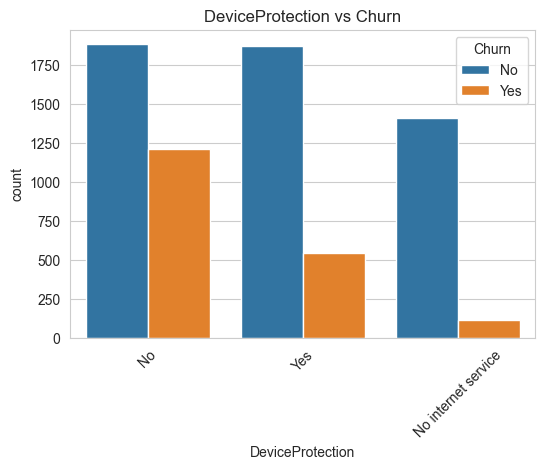

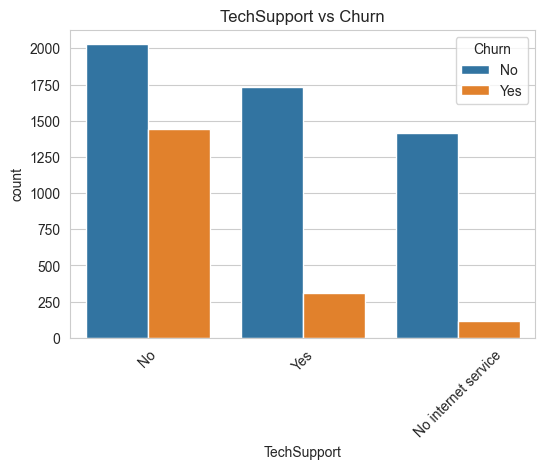

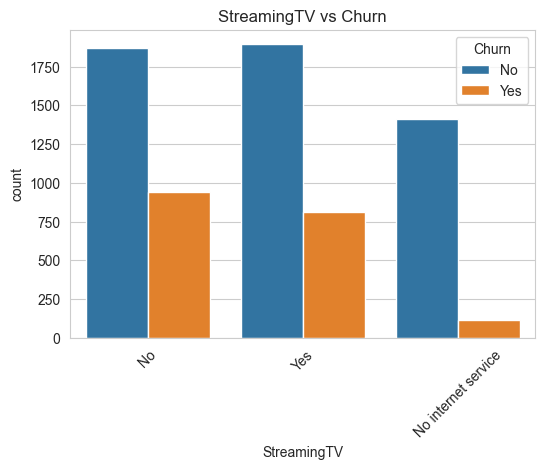

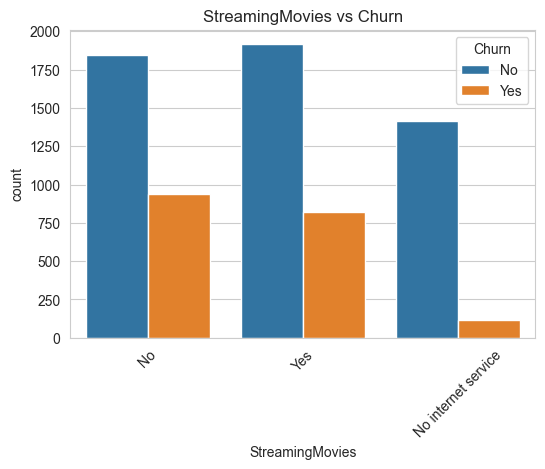

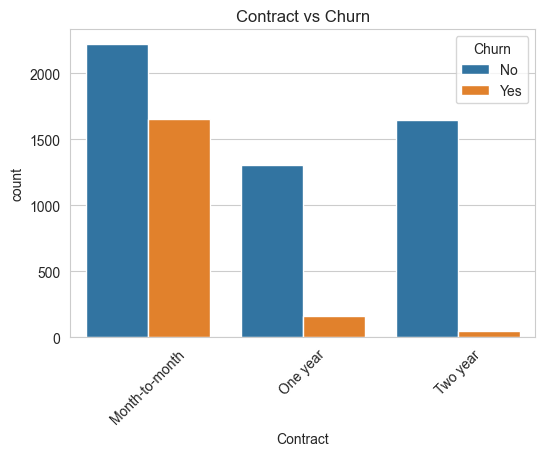

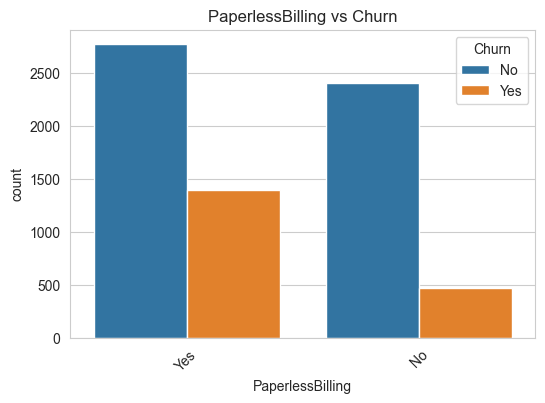

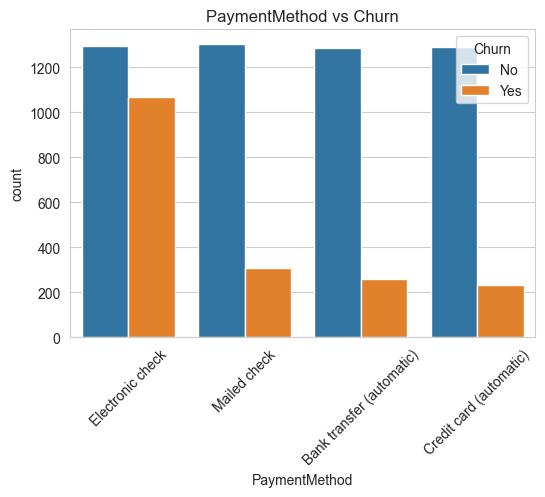

In [105]:
for col in cat_features:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='Churn', data=df)
    plt.title(f'{col} vs Churn')
    plt.xticks(rotation=45)
    plt.show()


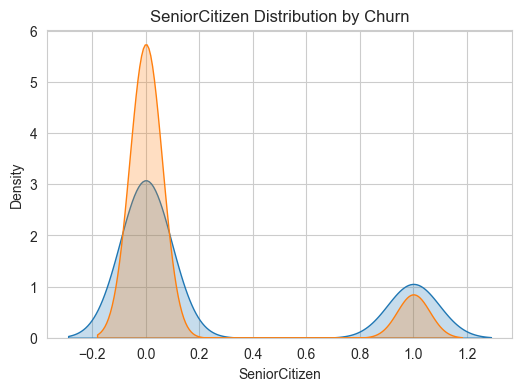

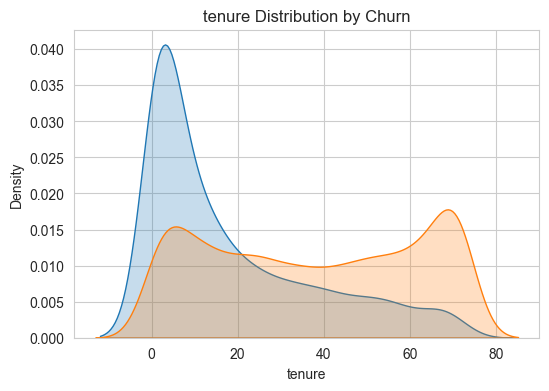

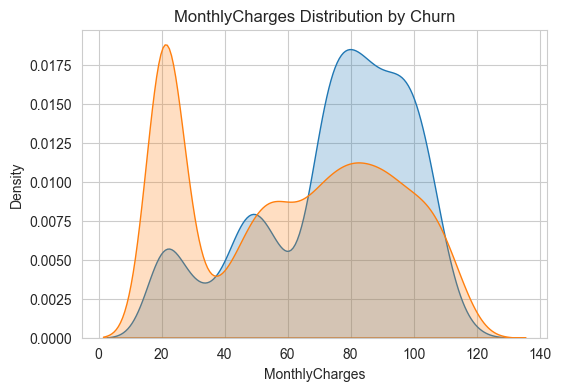

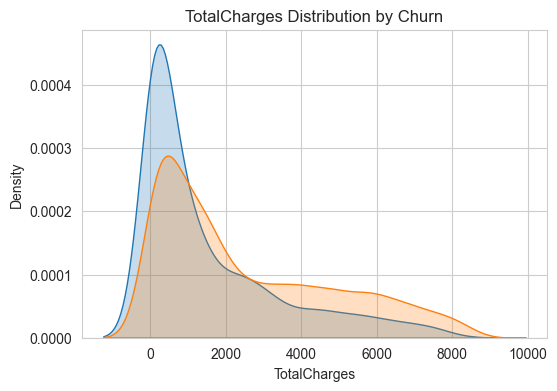

In [70]:
for col in num_features:
    plt.figure(figsize=(6,4))
    sns.kdeplot(df[df['Churn']=='Yes'][col], label='Churn', fill=True)
    sns.kdeplot(df[df['Churn']=='No'][col], label='No Churn', fill=True)
    plt.title(f'{col} Distribution by Churn')
    plt.show()



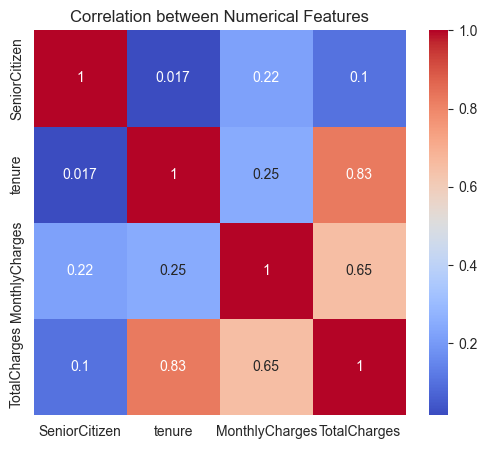

In [71]:
plt.figure(figsize=(6,5))
sns.heatmap(df[num_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Numerical Features')
plt.show()


In [72]:
# Encode categorical features
df_encoded = pd.get_dummies(df, columns=cat_features, drop_first=True)

# Encode target variable
df_encoded['Churn'] = df_encoded['Churn'].map({'Yes':1, 'No':0})

df_encoded.head()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


In [73]:
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']


In [74]:
import sklearn
print(sklearn.__version__)



1.8.0


In [75]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [77]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[num_features] = scaler.fit_transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])


In [78]:
X_train.shape, X_test.shape
y_train.value_counts(normalize=True)
y_test.value_counts(normalize=True)


Churn
0    0.734564
1    0.265436
Name: proportion, dtype: float64

In [80]:
# Check how many missing in each column
X_train.isnull().sum()



SeniorCitizen                            0
tenure                                   0
MonthlyCharges                           0
TotalCharges                             8
gender_Male                              0
Partner_Yes                              0
Dependents_Yes                           0
PhoneService_Yes                         0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingTV_Yes                          0
StreamingMovies_No internet service      0
StreamingMo

In [81]:
# Drop rows with missing TotalCharges
X_train = X_train.dropna()
y_train = y_train[X_train.index]

X_test = X_test.dropna()
y_test = y_test[X_test.index]


In [83]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Scale numerical features safely
X_train.loc[:, num_features] = scaler.fit_transform(X_train[num_features])
X_test.loc[:, num_features] = scaler.transform(X_test[num_features])



In [84]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [85]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Make predictions
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:,1]  # probability of churn

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC-AUC Score
roc_score = roc_auc_score(y_test, y_pred_prob)
print("\nROC-AUC Score:", roc_score)


Confusion Matrix:
[[924 108]
 [164 210]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1032
           1       0.66      0.56      0.61       374

    accuracy                           0.81      1406
   macro avg       0.75      0.73      0.74      1406
weighted avg       0.80      0.81      0.80      1406


ROC-AUC Score: 0.8419972640218878


In [86]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_model = RandomForestClassifier(
    n_estimators=200,      # number of trees
    random_state=42,
    class_weight='balanced' # handle class imbalance
)

# Train the model
rf_model.fit(X_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [106]:
# Predictions
y_pred_rf = rf_model.predict(X_test)
y_pred_prob_rf = rf_model.predict_proba(X_test)[:,1]  # probability of churn


In [107]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# ROC-AUC Score
roc_score_rf = roc_auc_score(y_test, y_pred_prob_rf)
print("\nROC-AUC Score:", roc_score_rf)


Confusion Matrix:
[[924 108]
 [192 182]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1032
           1       0.63      0.49      0.55       374

    accuracy                           0.79      1406
   macro avg       0.73      0.69      0.70      1406
weighted avg       0.77      0.79      0.78      1406


ROC-AUC Score: 0.8233946855697882


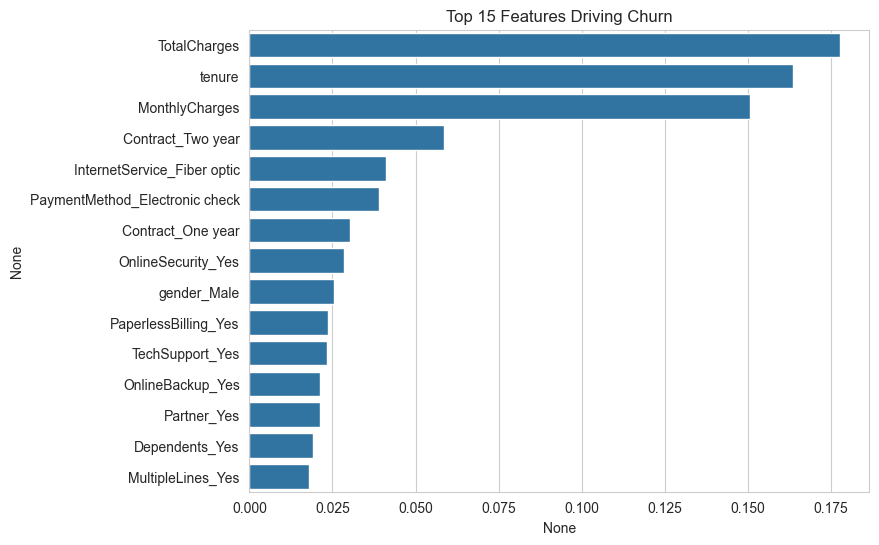

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
feat_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
feat_importances = feat_importances.sort_values(ascending=False)[:15]  # top 15 features

# Plot
plt.figure(figsize=(8,6))
sns.barplot(x=feat_importances, y=feat_importances.index)
plt.title('Top 15 Features Driving Churn')
plt.show()


In [109]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())


Before SMOTE: Churn
0    4131
1    1495
Name: count, dtype: int64
After SMOTE: Churn
0    4131
1    4131
Name: count, dtype: int64


In [110]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced']
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    scoring='roc_auc',
    n_jobs=-1
)

grid_search.fit(X_train_res, y_train_res)
print("Best parameters:", grid_search.best_params_)


Best parameters: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [111]:
best_rf = grid_search.best_estimator_
best_rf.fit(X_train_res, y_train_res)

y_pred_final = best_rf.predict(X_test)
y_pred_prob_final = best_rf.predict_proba(X_test)[:,1]

# Evaluate
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_final))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_final))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred_prob_final))


Confusion Matrix:
[[838 194]
 [135 239]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.81      0.84      1032
           1       0.55      0.64      0.59       374

    accuracy                           0.77      1406
   macro avg       0.71      0.73      0.71      1406
weighted avg       0.78      0.77      0.77      1406


ROC-AUC Score: 0.8203154147494094


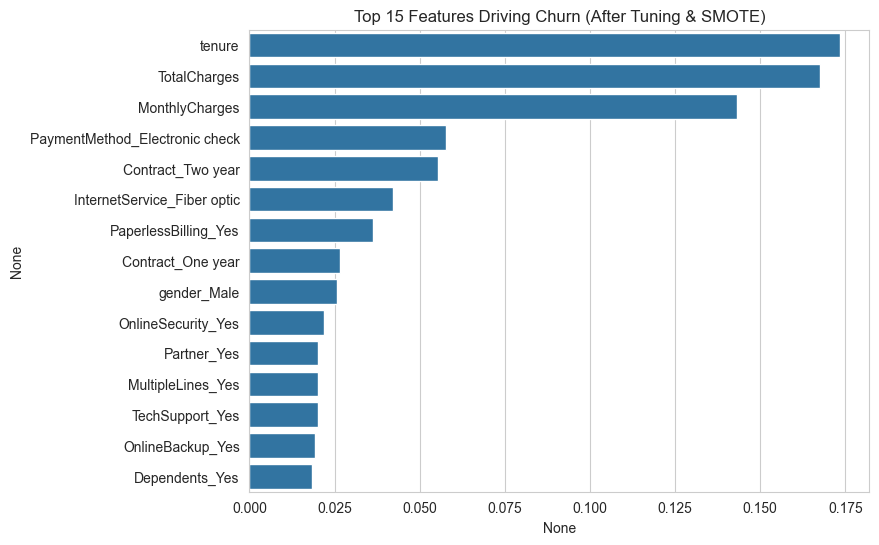

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

feat_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns)
feat_importances = feat_importances.sort_values(ascending=False)[:15]

plt.figure(figsize=(8,6))
sns.barplot(x=feat_importances, y=feat_importances.index)
plt.title('Top 15 Features Driving Churn (After Tuning & SMOTE)')
plt.show()


In [113]:
pip freeze > requirements.txt


Note: you may need to restart the kernel to use updated packages.
